# Spherical Gross-Pitaevskii
_Marc Camús Sais, Abel Muñoz Navarro_

___
## Harmonic oscilator

In [50]:
import numpy as np
from tqdm import tqdm


# Starting variables
ass=0.
dl = 0.0001 
N = 1000
L = 1000
dr = 0.015
alpha = 0.3
niter = 50000  

# Useful definitions
alpha2 = alpha*alpha # exponential parameter for starting wavefunction (wf)
cons = N*ass # interaction coupling constant
cvar=2.*np.sqrt(alpha)**3/np.sqrt(np.sqrt(np.pi)) # amplitude of wf

# Lists
r = np.zeros(L) # radious (space)
frev = np.zeros(L) # proposed reduced wf
freo = np.zeros(L) # old reduced wf (last step)
fren = np.zeros(L) # new reduced wf (current step)
fred = np.zeros(L)  # second radial derivative of the reduced wf
mu = np.zeros(L) # Gross-Pitaevskii's equation right hand side parameter
virials = np.zeros(niter) # keeping track of the values of the virial

virial_0 = 10000

# Starting wf
for i in range(1,L):
    r[i]=dr*i
    r2=r[i]*r[i]
    frev[i]=cvar*r[i]*np.exp(-0.5*alpha2*r2)
    freo[i]=frev[i]

# Seeking the gs    
for iteration in tqdm(range(niter)):
    e = 0.
    norm = 0.
    virial = 0.
    
    # Derivative of the reduced wf
    for i in range(1,L-1):
        fred[i]=(freo[i-1]+freo[i+1]-2.*freo[i])/(dr*dr)
    fred[-1] = (freo[-1]-2.*freo[-2])/(dr*dr)
    
    # We calculate mu (list) and apply one step -dl*mu
    for i in range(1,L-1):
        r2=r[i]*r[i]
        if (i == 0):
            mu[i]=0.
        else:
            e = (e - freo[i]*fred[i]*0.5 + 
                 0.5*r2*freo[i]*freo[i] + 
                 0.5*cons*r2*(freo[i]/r[i])**4)
            # keeping track of the virial evolution
            virial = (virial - freo[i]*fred[i] -
                      r2*freo[i]*freo[i] + 
                      3.*0.5*cons*r2*(freo[i]/r[i])**4)
            mu[i]= (-0.5*fred[i]/freo[i] + 
                    0.5*r2+cons*(freo[i]/r[i])**2)
        # applying the step and calculation of the normalization
        fren[i]=freo[i]-dl*mu[i]*freo[i]
        norm=norm+fren[i]*fren[i]
        
    # completing the integrals
    norm=np.sqrt(norm*dr)
    e=e*dr
    virial=virial*dr
    
    # normalization of our output state
    for i in range(1,L-1):
        freo[i]=fren[i]/norm
    
    # if we found the 'best' virial, break
    if virial_0<virial:
        break
    else:
        virials[iteration] = virial
        virial0=virial

100%|████████████████████████████████████| 50000/50000 [06:14<00:00, 133.43it/s]


In [2]:
print("Energy density in adimensional units for the harmonic oscilator:", e)
print("Average mu:", mu[:-1].sum()/len(mu[:-1]))

Energy density in adimensional units for the harmonic oscilator: 1.4999648471556348
Average mu: 1.50067793571127


In [49]:
# To obtain nice plots
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

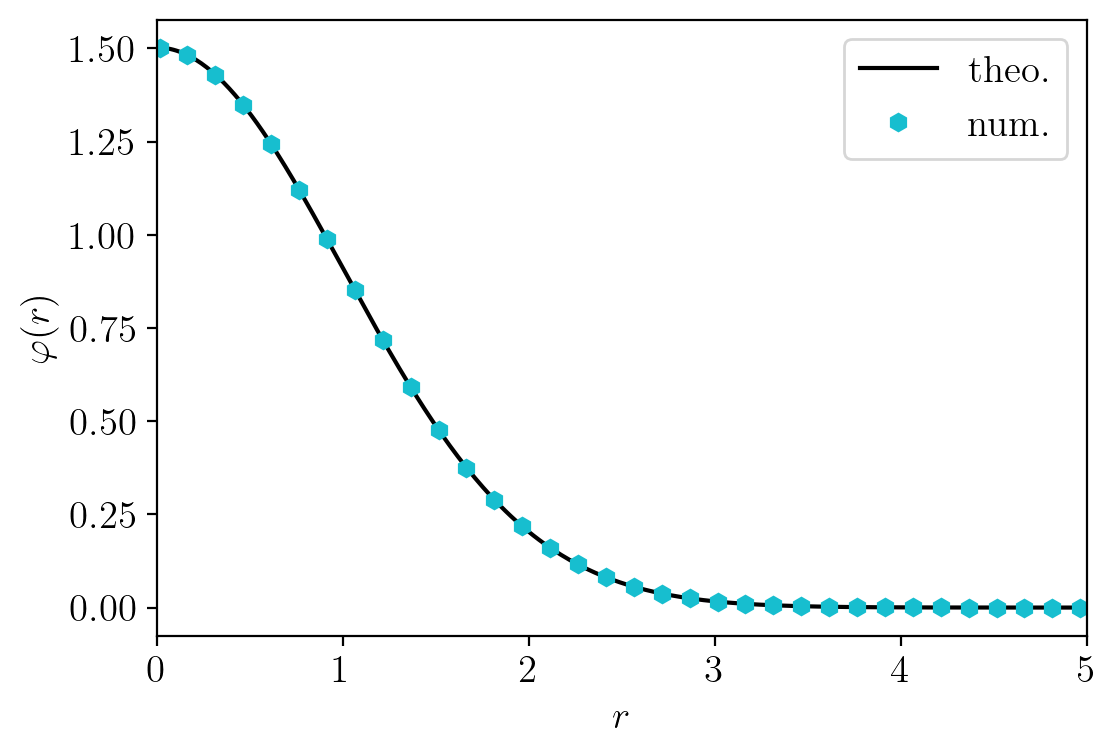

In [82]:
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(r[1:], np.exp(-0.5*r[1:]**2)/np.sqrt(sum(np.exp(-r[1:]**2)*r[1:]**2*dr)),linestyle='-',color='black', label='theo.')
plt.plot(r[1::10],freo[1::10]/r[1::10],'h', color='tab:cyan', label='num.')
plt.ylabel('$\\varphi (r)$')
plt.xlabel('$r$')
plt.legend()
plt.xlim(0,5)
plt.show()

fig.savefig('hosc.pdf')

## Interaction

In [20]:
import numpy as np
from tqdm import tqdm
import pandas as pd


# Starting variables
ass= 0.00433
dl = 0.0001 
L = 1000
dr = 0.015
alpha = 0.3
niter = 50000  
    
scalar = pd.DataFrame(columns=['N','e','k','hosc','vint','virial'])

for N in [10,100,1000,10000,100000,1000000]:

    print('Actual N:', N)
    
    vector = pd.DataFrame()

    # Useful definitions
    alpha2 = alpha*alpha # exponential parameter for starting wavefunction (wf)
    cons = N*ass # interaction coupling constant
    cvar=2.*np.sqrt(alpha)**3/np.sqrt(np.sqrt(np.pi)) # amplitude of wf

    # Lists
    r = np.zeros(L) # radious (space)
    frev = np.zeros(L) # proposed reduced wf
    freo = np.zeros(L) # old reduced wf (last step)
    fren = np.zeros(L) # new reduced wf (current step)
    fred = np.zeros(L)  # second radial derivative of the reduced wf
    mu = np.zeros(L) # Gross-Pitaevskii's equation right hand side parameter
    rho = np.zeros(L)
    virials = np.zeros(niter) # keeping track of the values of the virial

    virial_0 = 10000

    for i in range(1,L):
        r[i]=dr*i
        r2=r[i]*r[i]
        frev[i]=cvar*r[i]*np.exp(-0.5*alpha2*r2)
        freo[i]=frev[i]
    
    for iteration in range(niter):
        k = 0.
        vint = 0.
        hosc = 0.
        e = 0.
        norm = 0.
        virial = 0.

        for i in range(1,L-1):
            fred[i]=(freo[i-1]+freo[i+1]-2.*freo[i])/(dr*dr)
        fred[-1] = (freo[-1]-2.*freo[-2])/(dr*dr)

        for i in range(1,L-1):
            r2=r[i]*r[i]
            if (i == 0):
                mu[i]=0.
            else:
                k = k - freo[i]*fred[i]*0.5
                hosc = hosc + 0.5*r2*freo[i]*freo[i]
                vint = vint + 0.5*cons*r2*(freo[i]/r[i])**4
                e = k + hosc + vint
                virial = 2*k - 2*hosc +3*vint
                mu[i]= (-0.5*fred[i]/freo[i] + 
                        0.5*r2+cons*(freo[i]/r[i])**2)
                rho[i] = ((freo[i]/r[i])**2)/(4*np.pi)
            fren[i]=freo[i]-dl*mu[i]*freo[i]
            norm=norm+fren[i]*fren[i]
        norm=np.sqrt(norm*dr)
        e=e*dr
        k=k*dr
        hosc=hosc*dr
        vint=vint*dr
        virial=virial*dr

        for i in range(1,L-1):
            freo[i]=fren[i]/norm

        if virial_0<virial:
            print('convergence reached')
            break
        else:
            virials[iteration] = virial
            virial0=virial
        if np.mod(iteration,5000)==0:
            print('it:',iteration, 'e=',e, 'virial:',virial)
            
    vector['r'] = r[1:]
    vector['R'] = freo[1:]
    vector['phi'] = freo[1:]/r[1:]
    vector['mu'] = mu[1:]
    vector['rho'] = rho[1:]
    
    filename = 'vector_N_'+str(N)+'.txt'
    vector.to_csv(filename, sep='\t', index=False)
    
    scalar.loc[len(scalar.index)] = [N, e, k, hosc, vint, virial] 
    
filename = 'scalar_values.txt'    
scalar.to_csv(filename, sep='\t', index=False)    

Actual N: 10000
it: 0 e= 8.867235432109624 virial: -15.13245487415735
it: 5000 e= 5.0580968529571 virial: -0.7222304484910242
it: 10000 e= 5.04195012966363 virial: -0.1182491579469115
it: 15000 e= 5.041543463176388 virial: -0.020884707761040885
it: 20000 e= 5.041531330124498 virial: -0.0036754898591058803
it: 25000 e= 5.041530958489029 virial: -0.0006381069564429253
it: 30000 e= 5.041530947057408 virial: -0.00010398942756324914
it: 35000 e= 5.041530946705477 virial: -1.020688823700766e-05
it: 40000 e= 5.041530946694698 virial: 6.251757279756021e-06
it: 45000 e= 5.041530946694322 virial: 9.13979023664524e-06
Actual N: 100000
it: 0 e= 13.064866212265443 virial: -2.5395625336898875
it: 5000 e= 12.105360334715302 virial: -0.2525068868646872
it: 10000 e= 12.103964869284491 virial: -0.02850091320423701
it: 15000 e= 12.103950081119548 virial: -0.003145341770476193
it: 20000 e= 12.103949907353208 virial: -0.00033996351609630435
it: 25000 e= 12.103949905292936 virial: -3.325019356680059e-05
it:

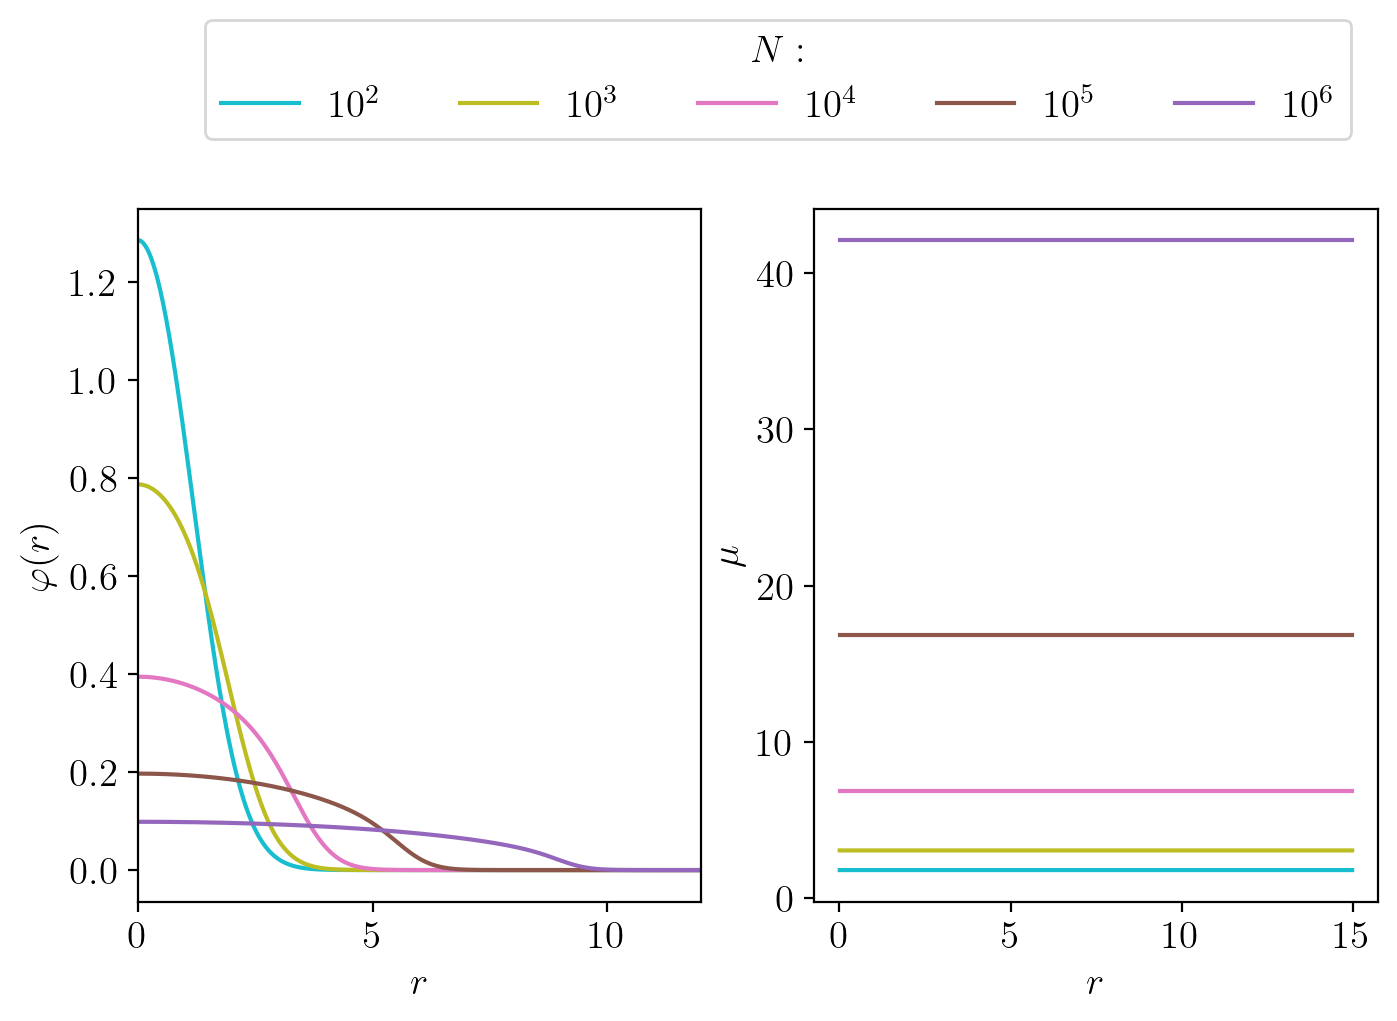

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8, 4.5)

N100 = pd.read_csv('vector_N_100.txt',sep='\t',header=0)
N1000 = pd.read_csv('vector_N_1000.txt',sep='\t',header=0)
N10000 = pd.read_csv('vector_N_10000.txt',sep='\t',header=0)
N100000 = pd.read_csv('vector_N_100000.txt',sep='\t',header=0)
N1000000 = pd.read_csv('vector_N_1000000.txt',sep='\t',header=0)

ax[0].plot(N100['r'],N100['phi'],'-',label='$10^2$',color = 'tab:cyan')
ax[0].plot(N1000['r'],N1000['phi'],'-',label='$10^3$',color = 'tab:olive')
ax[0].plot(N10000['r'],N10000['phi'],'-',label='$10^4$', color = 'tab:pink')
ax[0].plot(N100000['r'],N100000['phi'],'-',label='$10^5$', color= 'tab:brown')
ax[0].plot(N1000000['r'],N1000000['phi'],'-',label='$10^6$', color = 'tab:purple')

ax[1].plot(N100['r'][:-1],N100['mu'][:-1],'-',color = 'tab:cyan')
ax[1].plot(N1000['r'][:-1],N1000['mu'][:-1],'-',color = 'tab:olive')
ax[1].plot(N10000['r'][:-1],N10000['mu'][:-1],'-', color = 'tab:pink')
ax[1].plot(N100000['r'][:-1],N100000['mu'][:-1],'-', color= 'tab:brown')
ax[1].plot(N1000000['r'][:-1],N1000000['mu'][:-1],'-', color = 'tab:purple')

ax[0].set_ylabel('$\\varphi (r)$')
ax[1].set_ylabel('$\mu$')
ax[0].set_xlabel('$r$')
ax[1].set_xlabel('$r$')
ax[0].legend(title='$N:$', ncols=5,loc=(0.12,1.1))
ax[0].set_xlim(0,12)

fig.savefig('wf_N.pdf', bbox_inches="tight")

In [48]:
import numpy as np
print("mu's")
print(100,np.sum(N100['mu'][:-1])/len(N100['mu'][:-1]))
print(1000,np.sum(N1000['mu'][:-1])/len(N1000['mu'][:-1]))
print(10000,np.sum(N10000['mu'][:-1])/len(N10000['mu'][:-1]))
print(100000,np.sum(N100000['mu'][:-1])/len(N100000['mu'][:-1]))
print(1000000,np.sum(N1000000['mu'][:-1])/len(N1000000['mu'][:-1]))

mu's
100 1.7885643785954124
1000 3.044647626802276
10000 6.8658617861453255
100000 16.846593669424017
1000000 42.1191622480312


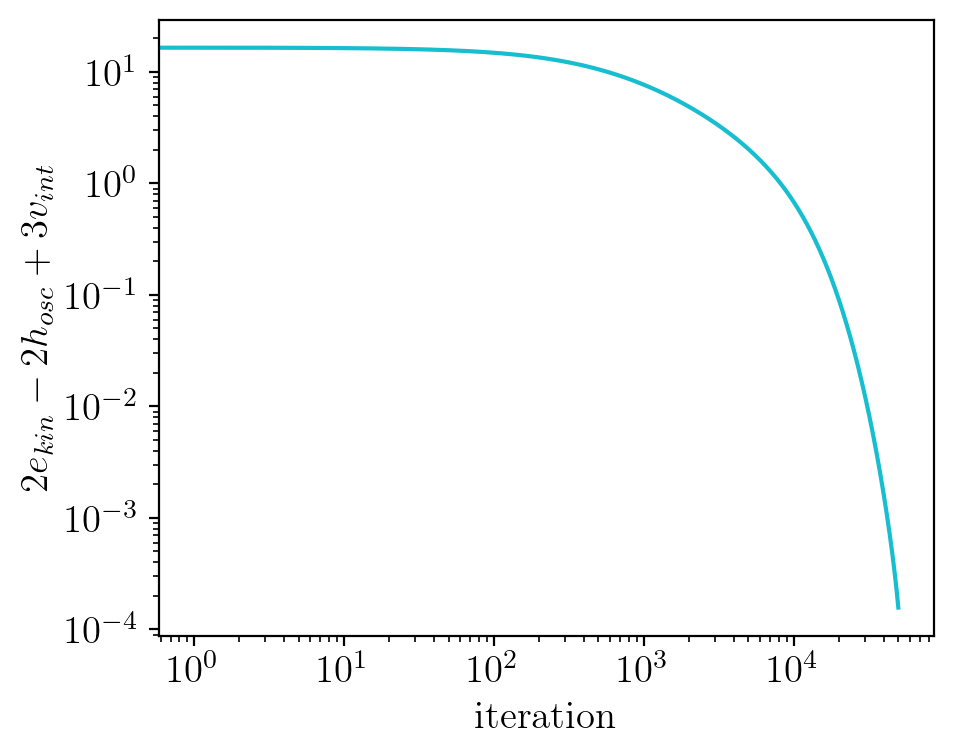

In [53]:
fig = plt.figure()

fig.set_size_inches(5, 4)
plt.plot(np.abs(virials),color='tab:cyan')
plt.loglog()
plt.xlabel('iteration')
plt.ylabel('$2 e_{kin}-2 h_{osc}+3 v_{int}$')

plt.show()

fig.savefig('virial.pdf',bbox_inches="tight")


## Thomas-Fermi

In [ ]:
import numpy as np
from tqdm import tqdm
import pandas as pd


# Starting variables
ass= 0.00433
dl = 0.0001 
L = 1000
dr = 0.015
alpha = 0.3
niter = 50000  
    
scalar = pd.DataFrame(columns=['N','e','k','hosc','vint','virial'])

for N in [10,100,1000,10000,100000,1000000]:
#for N in [10000,100000,1000000]:
    print('Actual N:', N)
    
    vector = pd.DataFrame()

    # Useful definitions
    alpha2 = alpha*alpha # exponential parameter for starting wavefunction (wf)
    cons = N*ass # interaction coupling constant
    cvar=2.*np.sqrt(alpha)**3/np.sqrt(np.sqrt(np.pi)) # amplitude of wf

    # Lists
    r = np.zeros(L) # radious (space)
    frev = np.zeros(L) # proposed reduced wf
    freo = np.zeros(L) # old reduced wf (last step)
    fren = np.zeros(L) # new reduced wf (current step)
    fred = np.zeros(L)  # second radial derivative of the reduced wf
    mu = np.zeros(L) # Gross-Pitaevskii's equation right hand side parameter
    rho = np.zeros(L)
    virials = np.zeros(niter) # keeping track of the values of the virial

    virial_0 = 10000

    for i in range(1,L):
        r[i]=dr*i
        r2=r[i]*r[i]
        frev[i]=cvar*r[i]*np.exp(-0.5*alpha2*r2)
        freo[i]=frev[i]
    
    for iteration in range(niter):
        k = 0.
        vint = 0.
        hosc = 0.
        e = 0.
        norm = 0.
        virial = 0.

        for i in range(1,L-1):
            fred[i]=(freo[i-1]+freo[i+1]-2.*freo[i])/(dr*dr)
        fred[-1] = (freo[-1]-2.*freo[-2])/(dr*dr)

        for i in range(1,L-1):
            r2=r[i]*r[i]
            if (i == 0):
                mu[i]=0.
            else:
                k = k - freo[i]*fred[i]*0.5
                hosc = hosc + 0.5*r2*freo[i]*freo[i]
                vint = vint + 0.5*cons*r2*(freo[i]/r[i])**4
                e = k + hosc + vint
                virial = 2*k - 2*hosc +3*vint
                mu[i]= (0.5*r2+cons*(freo[i]/r[i])**2)
                rho[i] = ((freo[i]/r[i])**2)/(4*np.pi)
            fren[i]=freo[i]-dl*mu[i]*freo[i]
            norm=norm+fren[i]*fren[i]
        norm=np.sqrt(norm*dr)
        e=e*dr
        k=k*dr
        hosc=hosc*dr
        vint=vint*dr
        virial=virial*dr

        for i in range(1,L-1):
            freo[i]=fren[i]/norm

        if virial_0<virial:
            print('convergence reached')
            break
        else:
            virials[iteration] = virial
            virial0=virial
        if np.mod(iteration,5000)==0:
            print('it:',iteration, 'e=',e, 'virial:',virial)
            
    vector['r'] = r[1:]
    vector['R'] = freo[1:]
    vector['phi'] = freo[1:]/r[1:]
    vector['mu'] = mu[1:]
    vector['rho'] = rho[1:]
    
    filename = 'vector_N_'+str(N)+'_TF.txt'
    vector.to_csv(filename, sep='\t', index=False)
    
    scalar.loc[len(scalar.index)] = [N, e, k, hosc, vint, virial] 
    
filename = 'scalar_values_TF.txt'    
scalar.to_csv(filename, sep='\t', index=False)

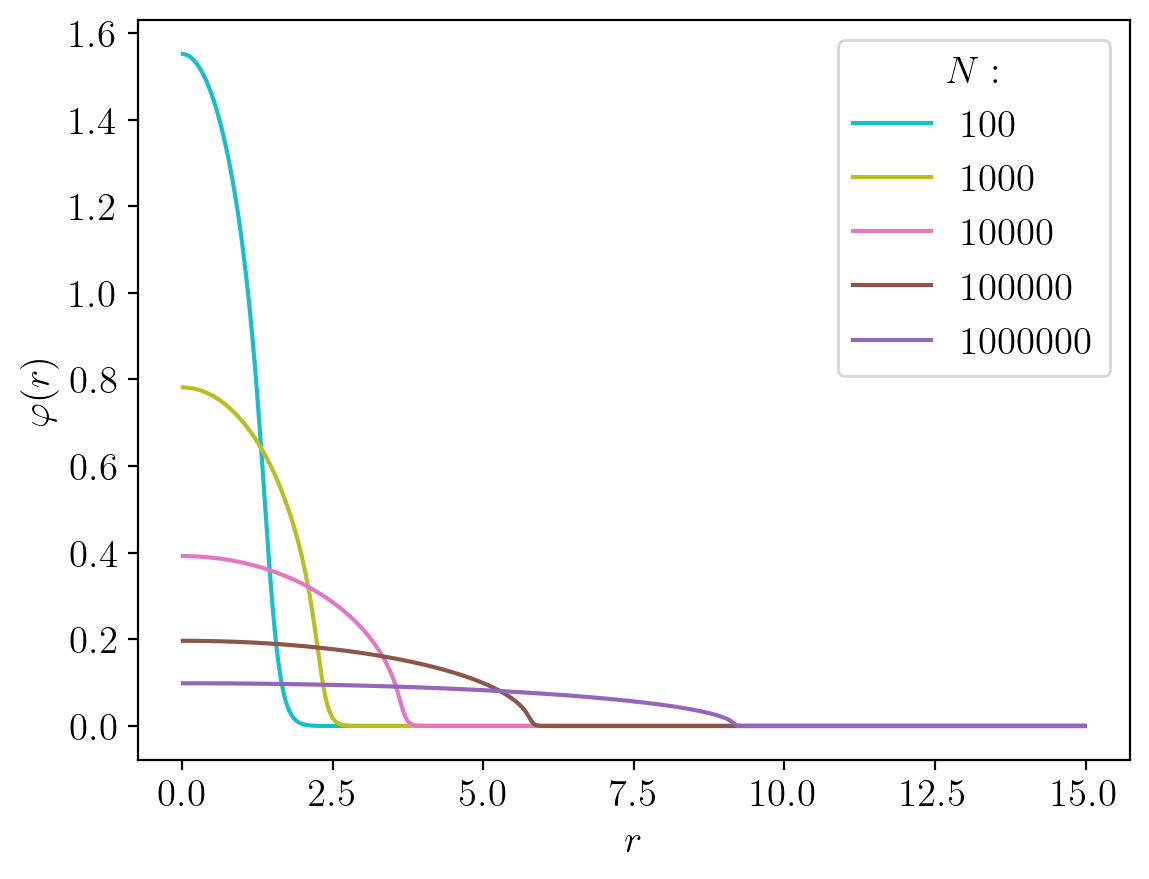

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


N100TF = pd.read_csv('vector_N_100_TF.txt',sep='\t',header=0)
N1000TF = pd.read_csv('vector_N_1000_TF.txt',sep='\t',header=0)
N10000TF = pd.read_csv('vector_N_10000_TF.txt',sep='\t',header=0)
N100000TF = pd.read_csv('vector_N_100000_TF.txt',sep='\t',header=0)
N1000000TF = pd.read_csv('vector_N_1000000_TF.txt',sep='\t',header=0)

plt.plot(N100['r'],N100TF['phi'],'-',label='100',color = 'tab:cyan')
plt.plot(N1000['r'],N1000TF['phi'],'-',label='1000',color = 'tab:olive')
plt.plot(N10000['r'],N10000TF['phi'],'-',label='10000', color = 'tab:pink')
plt.plot(N100000['r'],N100000TF['phi'],'-',label='100000', color= 'tab:brown')
plt.plot(N1000000['r'],N1000000TF['phi'],'-',label='1000000', color = 'tab:purple')

plt.ylabel('$\\varphi (r)$')
plt.xlabel('$r$')
plt.legend(title='$N:$')
plt.show()

In the TF aproach the $\mu$s obtained are not constant in all the space, we keep only the value for significant wave function amplitude, i.e. for small r. 

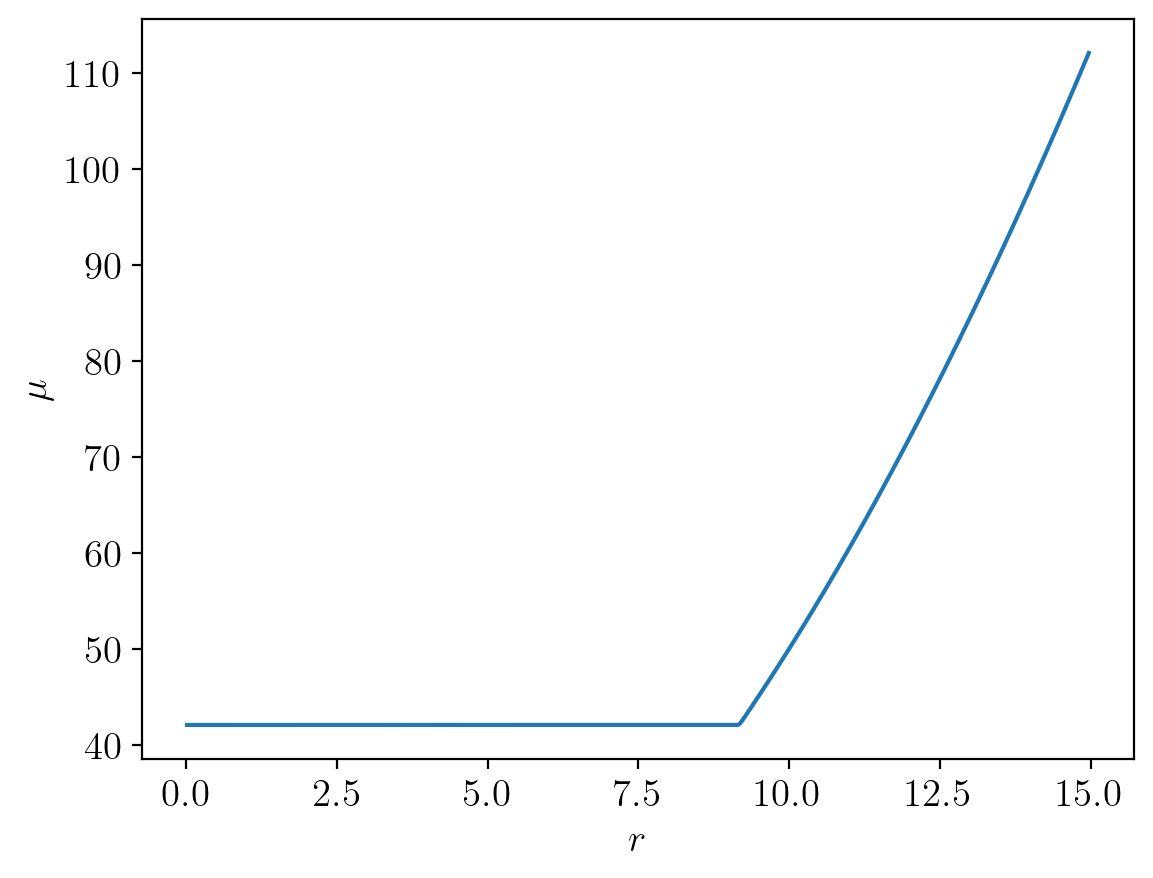

In [47]:
plt.plot(r[1:-1], N1000000TF['mu'][:-1])
plt.xlabel('$r$')
plt.ylabel('$\mu$')
plt.show()

- TF and GP wf comparison

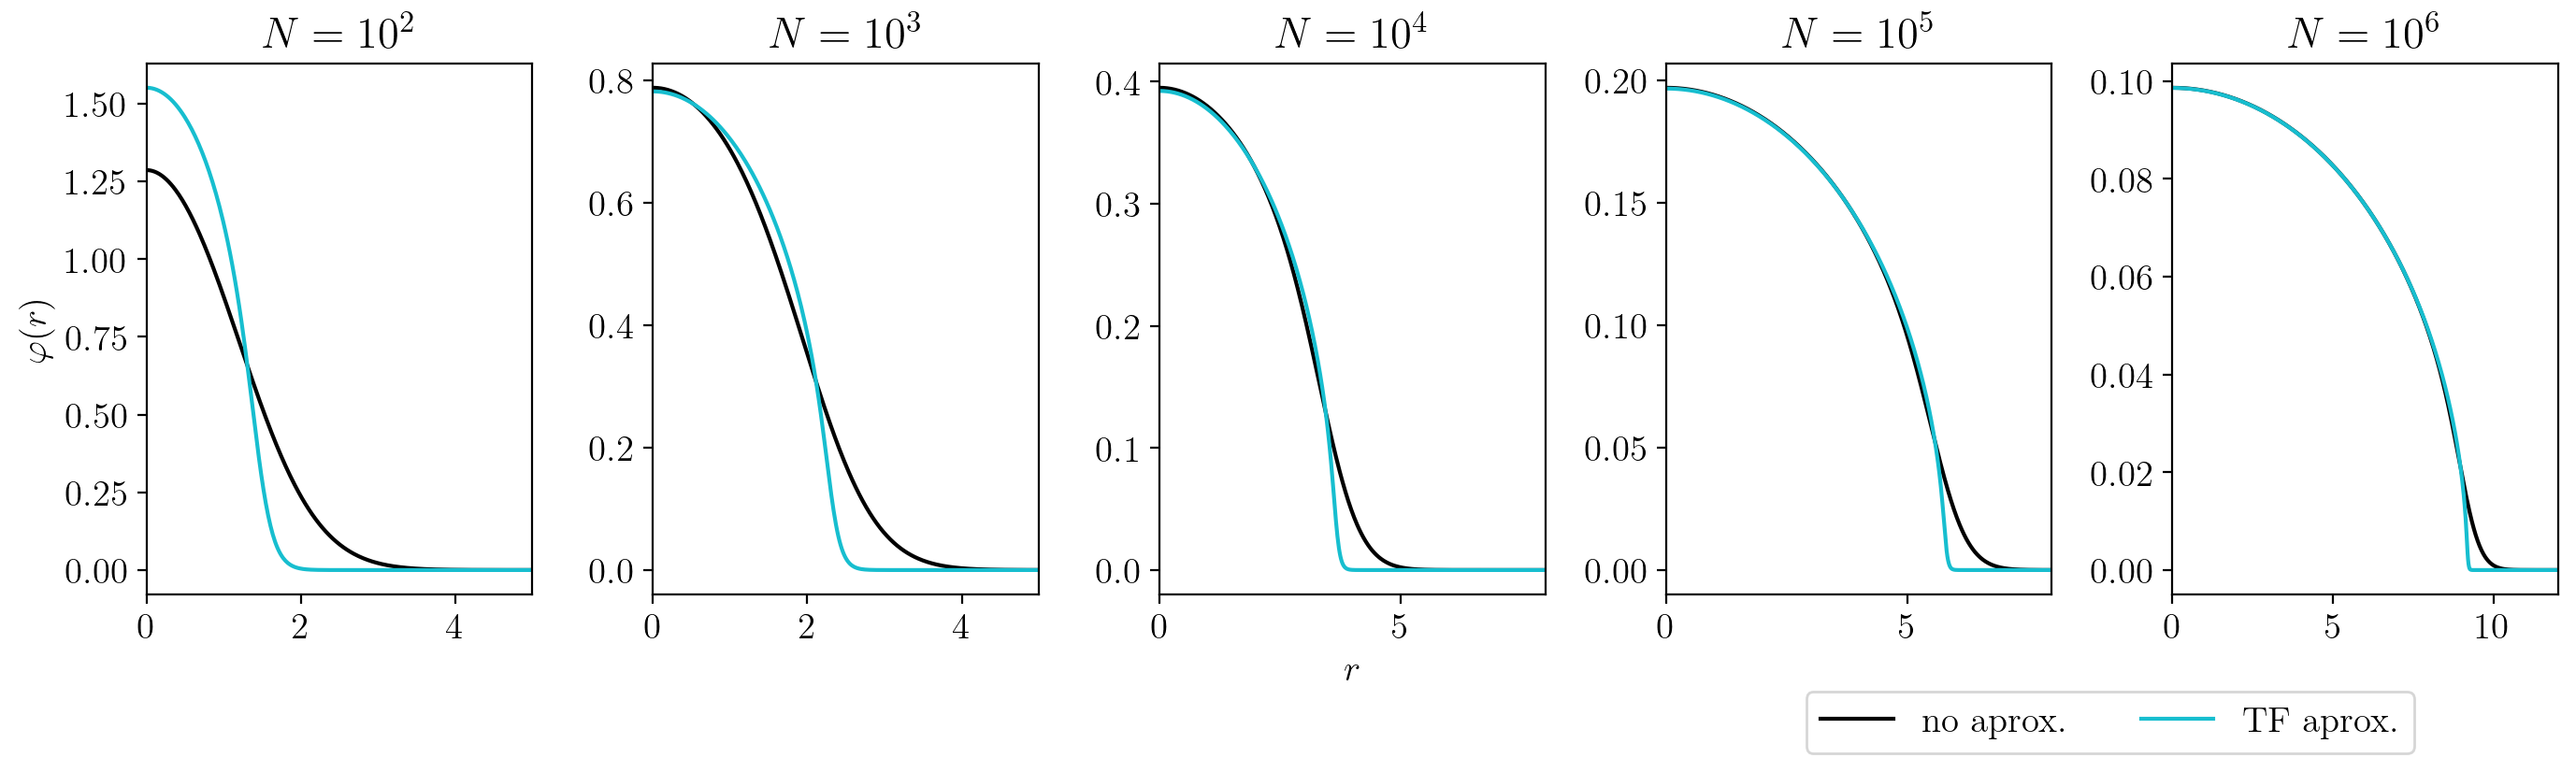

In [27]:
import pandas as pd

fig, ax = plt.subplots(1,5)
fig.set_size_inches(14, 4)

N100 = pd.read_csv('vector_N_100.txt',sep='\t',header=0)
N1000 = pd.read_csv('vector_N_1000.txt',sep='\t',header=0)
N10000 = pd.read_csv('vector_N_10000.txt',sep='\t',header=0)
N100TF = pd.read_csv('vector_N_100_TF.txt',sep='\t',header=0)
N1000TF = pd.read_csv('vector_N_1000_TF.txt',sep='\t',header=0)
N10000TF = pd.read_csv('vector_N_10000_TF.txt',sep='\t',header=0)
N100000TF = pd.read_csv('vector_N_100000_TF.txt',sep='\t',header=0)
N1000000TF = pd.read_csv('vector_N_1000000_TF.txt',sep='\t',header=0)

ax[0].plot(N100['r'],N100['phi'],'-',label='no aprox.',color='black')
ax[0].plot(N100['r'],N100TF['phi'],'-',label='TF aprox.',color='tab:cyan')
ax[1].plot(N1000['r'],N1000['phi'],'-',color='black')
ax[1].plot(N1000['r'],N1000TF['phi'],'-',color='tab:cyan')
ax[2].plot(N10000['r'],N10000['phi'],'-',color='black')
ax[2].plot(N10000['r'],N10000TF['phi'],'-',color='tab:cyan')
ax[3].plot(N100000['r'],N100000['phi'],'-',color='black')
ax[3].plot(N100000['r'],N100000TF['phi'],'-',color='tab:cyan')
ax[4].plot(N1000000['r'],N1000000['phi'],'-',color='black')
ax[4].plot(N1000000['r'],N1000000TF['phi'],'-',color='tab:cyan')


ax[0].set_ylabel('$\\varphi (r)$')
#ax[1].set_ylabel('$\mu$')
ax[2].set_xlabel('$r$')
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[2].set_xlim(0,8)
ax[3].set_xlim(0,8)
ax[4].set_xlim(0,12)
ax[0].set_title('$N=10^2$')
ax[1].set_title('$N=10^3$')
ax[2].set_title('$N=10^4$')
ax[3].set_title('$N=10^5$')
ax[4].set_title('$N=10^6$')

fig.tight_layout()
ax[0].legend(ncols=2,loc=(4.3,-0.3))

fig.savefig('TF_N.pdf', bbox_inches="tight")

- Normalised to 1 densities

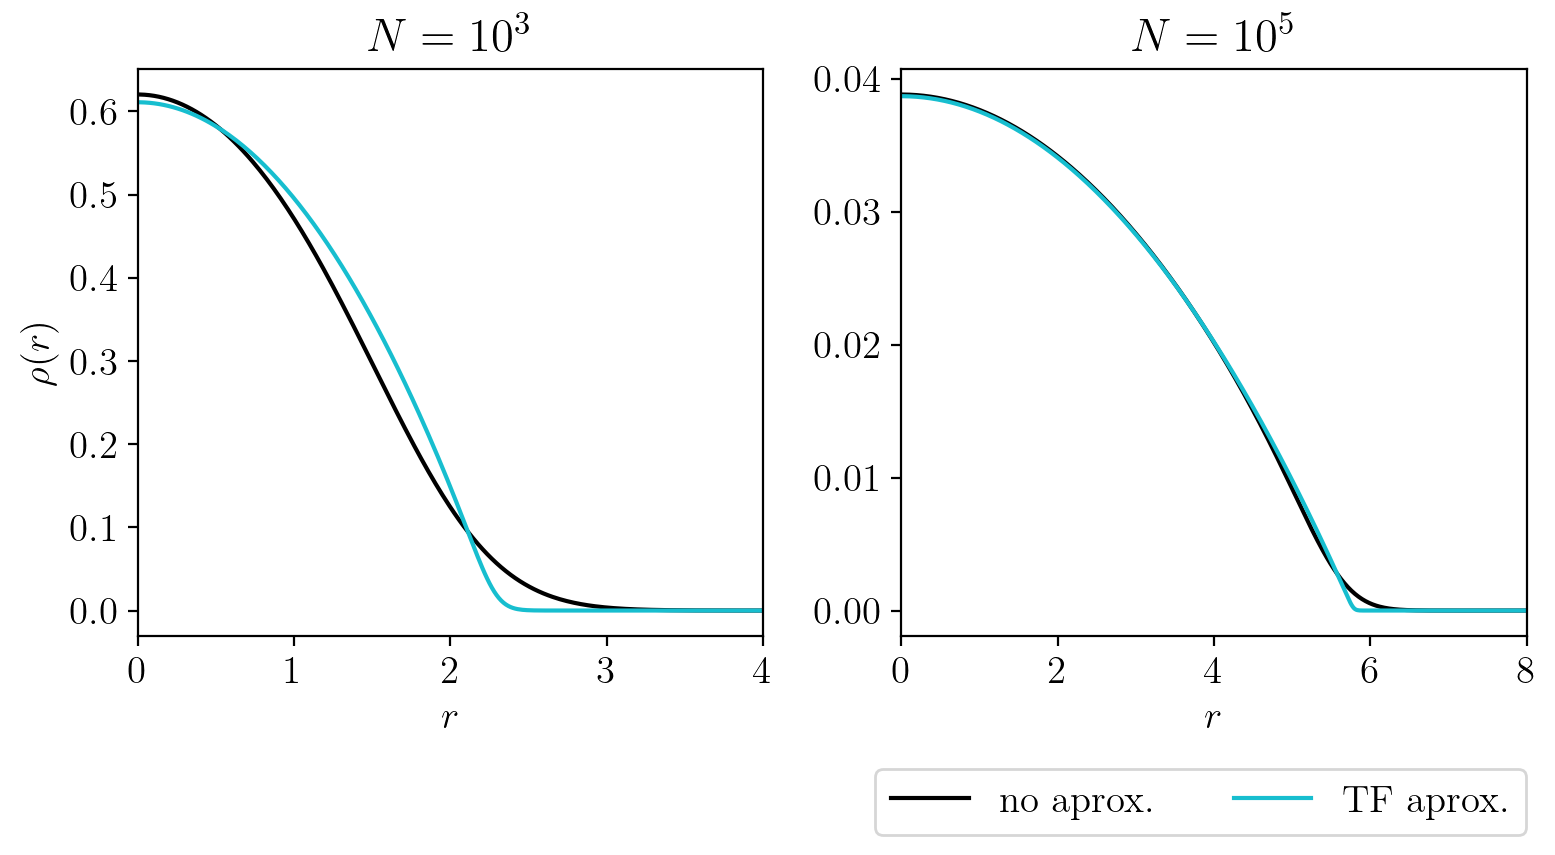

In [26]:
import pandas as pd

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8, 4)



N1000 = pd.read_csv('vector_N_1000.txt',sep='\t',header=0)
N100000 = pd.read_csv('vector_N_100000.txt',sep='\t',header=0)
N1000TF = pd.read_csv('vector_N_1000_TF.txt',sep='\t',header=0)
N100000TF = pd.read_csv('vector_N_100000_TF.txt',sep='\t',header=0)

norm1 = ((N1000['rho']*N1000['r']*N1000['r']).sum()*(N1000['r'][1]-N1000['r'][0]))
norm2 = ((N1000TF['rho']*N1000TF['r']*N1000TF['r']).sum()*(N1000TF['r'][1]-N1000TF['r'][0]))
norm3 = ((N100000['rho']*N100000['r']*N100000['r']).sum()*(N100000['r'][1]-N100000['r'][0]))
norm4 = ((N100000TF['rho']*N100000TF['r']*N100000TF['r']).sum()*(N100000TF['r'][1]-N100000TF['r'][0]))


ax[0].plot(N1000['r'],N1000['rho']/norm1,'-',label='no aprox.',color='black')
ax[0].plot(N1000['r'],N1000TF['rho']/norm2,'-',label='TF aprox.',color='tab:cyan')
ax[1].plot(N1000['r'],N100000['rho']/norm3,'-',color='black')
ax[1].plot(N1000['r'],N100000TF['rho']/norm4,'-',color='tab:cyan')


ax[0].set_ylabel('$\\rho (r)$')
#ax[1].set_ylabel('$\mu$')
ax[1].set_xlabel('$r$')
ax[0].set_xlabel('$r$')
ax[0].set_xlim(0,4)
ax[1].set_xlim(0,8)
ax[0].set_title('$N=10^3$')
ax[1].set_title('$N=10^5$')

fig.tight_layout()
ax[0].legend(ncols=2,loc=(1.18,-0.35))

fig.savefig('rho_TF.pdf', bbox_inches="tight")

## Exited states obtention
---
### 1st *

In [19]:
import numpy as np
from tqdm import tqdm
import pandas as pd

# Starting variables
ass=0.00433
dl = 0.0001 
N = 10000
L = 1000
dr = 0.015
alpha = 0.3
niter = 50000  

# Useful definitions
alpha2 = alpha*alpha # exponential parameter for starting wavefunction (wf)
cons = N*ass # interaction coupling constant
cvar=2.*np.sqrt(alpha)**3/np.sqrt(np.sqrt(np.pi)) # amplitude of wf

# Lists
r = np.zeros(L) # radious (space)
frev = np.zeros(L) # proposed reduced wf
freo = np.zeros(L) # old reduced wf (last step)
fren = np.zeros(L) # new reduced wf (current step)
fred = np.zeros(L)  # second radial derivative of the reduced wf
freg = np.zeros(L) # ground state wf
mu = np.zeros(L) # Gross-Pitaevskii's equation right hand side parameter
virials = np.zeros(niter) # keeping track of the values of the virial


# Ground State (obtained previously)
freg[1:] = pd.read_csv('vector_N_10000.txt',sep='\t',header=0)['R']

virial_0 = 10000

for i in range(1,L):
    r[i]=dr*i
    r2=r[i]*r[i]
    frev[i]=cvar*r[i]*np.exp(-0.5*alpha2*r2)
    freo[i]=frev[i]

print(sum(freo*freg)*dr)
freo = freo - sum(freo*freg)*dr*freg

norm = 0.
for i in range(1,L-1):
    norm = norm + freo[i]*freo[i]
norm = np.sqrt(norm*dr)
freo = freo/norm

    
for iteration in tqdm(range(niter)):
    e = 0.
    norm = 0.
    virial = 0.
    
    for i in range(1,L-1):
        fred[i]=(freo[i-1]+freo[i+1]-2.*freo[i])/(dr*dr)
    fred[-1] = (freo[-1]-2.*freo[-2])/(dr*dr)
    
    for i in range(1,L-1):
        r2=r[i]*r[i]
        if (i == 0):
            mu[i]=0.
        else:
            e = (e - freo[i]*fred[i]*0.5 + 
                 0.5*r2*freo[i]*freo[i] + 
                 0.5*cons*r2*(freo[i]/r[i])**4)
            virial = (virial - freo[i]*fred[i] -
                      r2*freo[i]*freo[i] + 
                      3.*0.5*cons*r2*(freo[i]/r[i])**4)
            mu[i]= (-0.5*fred[i]/freo[i] + 
                    0.5*r2+cons*(freo[i]/r[i])**2)
        fren[i]=freo[i]-dl*mu[i]*freo[i]
        norm=norm+fren[i]*fren[i]
    norm=np.sqrt(norm*dr)
    e=e*dr
    virial=virial*dr
    
    projection = 0.
    for i in range(1,L-1):
        projection = projection + fren[i]*freg[i]
    
    for i in range(1,L-1):
        fren[i] = fren[i] - projection*dr*freg[i]
        freo[i]=fren[i]/norm
        
    if virial_0<virial:
        break
    else:
        virials[iteration] = virial
        virial0=virial

0.7641947536528917


100%|████████████████████████████████████| 50000/50000 [07:32<00:00, 110.41it/s]


In [23]:
first_ex = pd.DataFrame(columns = ['r', 'R', 'phi'])

first_ex['r'] = r[1:]
first_ex['R'] = freo[1:]
first_ex['phi'] = freo[1:]/r[1:]

#first_ex.to_csv('first_ex.txt', sep='\t', index=False)

### 2nd *

In [135]:
import numpy as np
from tqdm import tqdm
import pandas as pd

# Starting variables
ass=0.00433
dl = 0.0001 
N = 10000
L = 1000
dr = 0.015
alpha = 0.3
niter = 50000  

# Useful definitions
alpha2 = alpha*alpha # exponential parameter for starting wavefunction (wf)
cons = N*ass # interaction coupling constant
cvar=2.*np.sqrt(alpha)**3/np.sqrt(np.sqrt(np.pi)) # amplitude of wf

# Lists
r = np.zeros(L) # radious (space)
frev = np.zeros(L) # proposed reduced wf
freo = np.zeros(L) # old reduced wf (last step)
fren = np.zeros(L) # new reduced wf (current step)
fred = np.zeros(L)  # second radial derivative of the reduced wf
freg = np.zeros(L) # ground state wf
fre1st = np.zeros(L) # first excited wf
mu = np.zeros(L) # Gross-Pitaevskii's equation right hand side parameter
virials = np.zeros(niter) # keeping track of the values of the virial


# Ground State (obtained previously)
freg[1:] = pd.read_csv('vector_N_10000.txt',sep='\t',header=0)['R']

# First excited state (obtained previously)
fre1st[1:] = pd.read_csv('first_ex.txt',sep='\t',header=0)['R']

virial_0 = 10000

for i in range(1,L):
    r[i]=dr*i
    r2=r[i]*r[i]
    frev[i]=cvar*r[i]*np.exp(-0.5*alpha2*r2)
    freo[i]=frev[i]

print(sum(freo*freg)*dr, sum(freo*fre1st)*dr)
freo = freo - sum(freo*freg)*dr*freg - sum(freo*fre1st)*dr*fre1st

norm = 0.
for i in range(1,L-1):
    norm = norm + freo[i]*freo[i]
norm = np.sqrt(norm*dr)
freo = freo/norm

    
for iteration in tqdm(range(niter)):
    e = 0.
    norm = 0.
    virial = 0.
    
    for i in range(1,L-1):
        fred[i]=(freo[i-1]+freo[i+1]-2.*freo[i])/(dr*dr)
    fred[-1] = (freo[-1]-2.*freo[-2])/(dr*dr)
    
    for i in range(1,L-1):
        r2=r[i]*r[i]
        if (i == 0):
            mu[i]=0.
        else:
            e = (e - freo[i]*fred[i]*0.5 + 
                 0.5*r2*freo[i]*freo[i] + 
                 0.5*cons*r2*(freo[i]/r[i])**4)
            virial = (virial - freo[i]*fred[i] -
                      r2*freo[i]*freo[i] + 
                      3.*0.5*cons*r2*(freo[i]/r[i])**4)
            mu[i]= (-0.5*fred[i]/freo[i] + 
                    0.5*r2+cons*(freo[i]/r[i])**2)
        fren[i]=freo[i]-dl*mu[i]*freo[i]
        norm=norm+fren[i]*fren[i]
    norm=np.sqrt(norm*dr)
    e=e*dr
    virial=virial*dr
    
    projection_gs = 0.
    projection_1st = 0.
    for i in range(1,L-1):
        projection_gs = projection_gs + fren[i]*freg[i]
        projection_1st = projection_1st + fren[i]*fre1st[i]
    
    for i in range(1,L-1):
        fren[i] = fren[i] - projection_gs*dr*freg[i] - projection_1st*dr*fre1st[i]
        freo[i]=fren[i]/norm
        
    if virial_0<virial:
        break
    else:
        virials[iteration] = virial
        virial0=virial

0.7641947536528917 0.23104105000065614


100%|█████████████████████████████████████| 50000/50000 [08:45<00:00, 95.24it/s]


In [137]:
second_ex = pd.DataFrame(columns = ['r', 'R', 'phi'])

second_ex['r'] = r[1:]
second_ex['R'] = freo[1:]
second_ex['phi'] = freo[1:]/r[1:]

second_ex.to_csv('second_ex.txt', sep='\t', index=False)

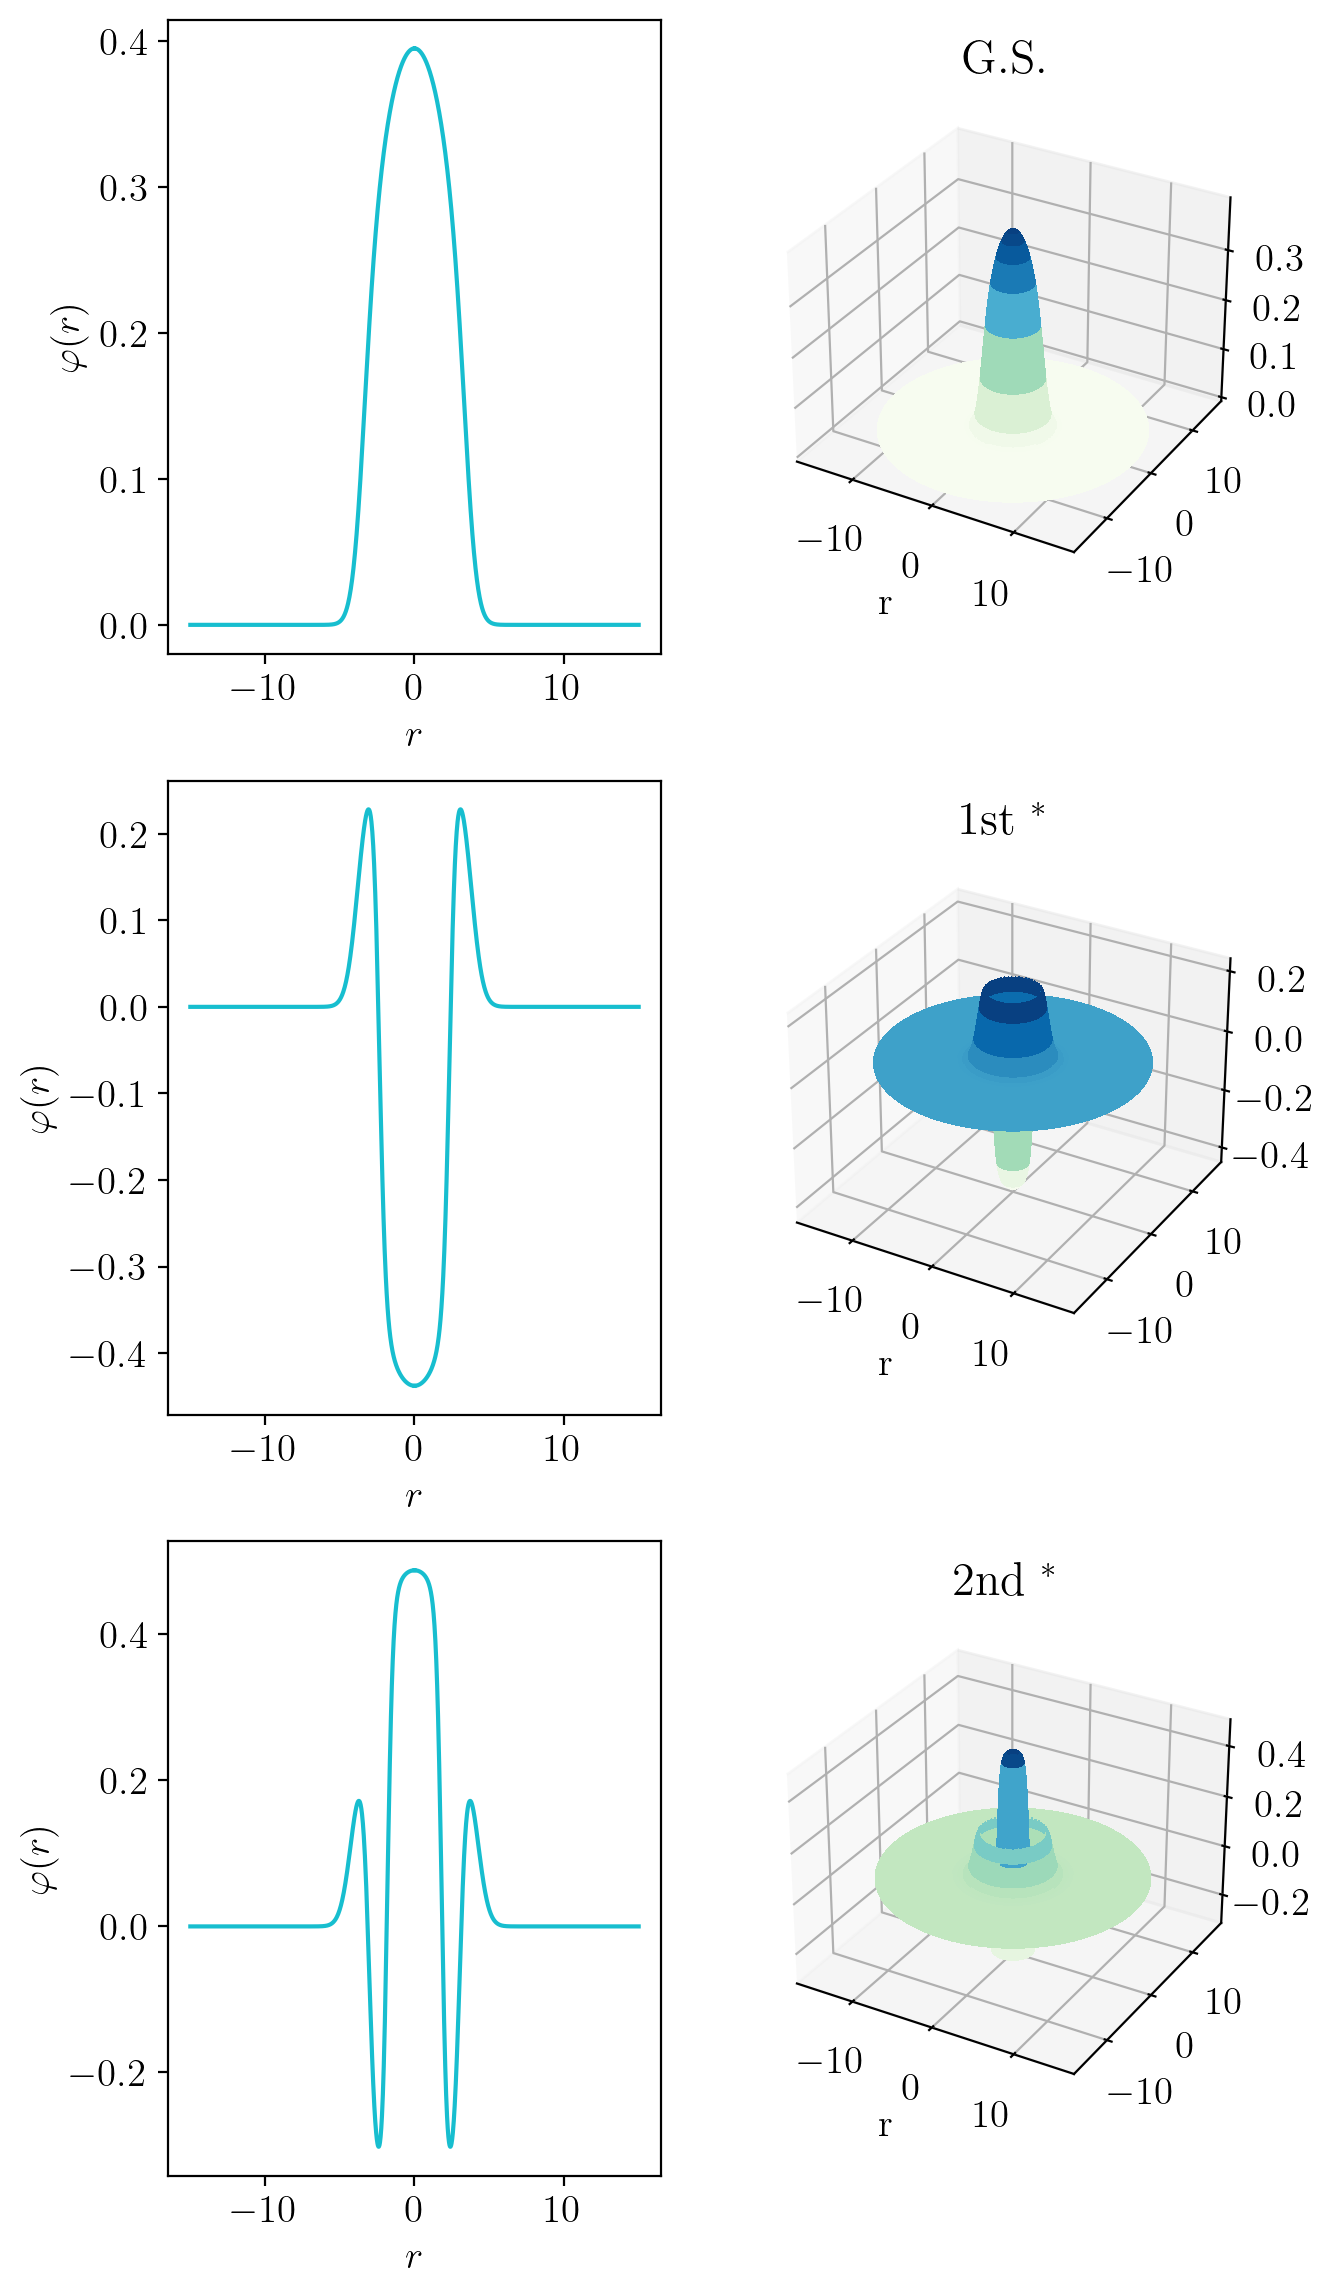

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

n = 10000

fig = plt.figure(figsize=(7,14))

# Line 1
freo = np.zeros(1000)
freo[1:] = np.array(N10000['R'])
r = np.zeros(1000)
r[1:] = np.array(N10000['r'])

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322,projection='3d')
y = np.concatenate((freo/r,freo/r))
x = np.concatenate((- r,r))
t = np.linspace(0, np.pi*2, n)

xn = np.outer(x, np.cos(t))
yn = np.outer(x, np.sin(t))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i:i+1,:] = np.full_like(zn[0,:], y[i])

ax1.plot(x, y,color='tab:cyan')
ax1.set_xlabel('$r$')
ax1.set_ylabel('$\\varphi (r)$')
ax2.plot_surface(xn, yn, zn, cmap=cm.GnBu, antialiased=False)
ax2.set_xlabel('r')
ax2.set_title('G.S.')

# Line 2
freo = np.zeros(1000)
r = np.zeros(1000)
freo[1:] = np.array(pd.read_csv('first_ex.txt',sep='\t',header=0)['R'])
r[1:] = np.array(pd.read_csv('vector_N_10000.txt',sep='\t',header=0)['r'])

ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324,projection='3d')

y = np.concatenate((freo/r,freo/r))
x = np.concatenate((- r,r))
t = np.linspace(0, np.pi*2, n)

xn = np.outer(x, np.cos(t))
yn = np.outer(x, np.sin(t))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i:i+1,:] = np.full_like(zn[0,:], y[i])

ax3.plot(x, y,color='tab:cyan')
ax3.set_xlabel('$r$')
ax3.set_ylabel('$\\varphi (r)$')
ax4.plot_surface(xn, yn, zn, cmap=cm.GnBu, antialiased=False)
ax4.set_xlabel('r')
ax4.set_title('1st $^*$')

# Line 3
freo = np.zeros(1000)
r = np.zeros(1000)
freo[1:] = np.array(pd.read_csv('second_ex.txt',sep='\t',header=0)['R'])
r[1:] = np.array(pd.read_csv('vector_N_10000.txt',sep='\t',header=0)['r'])

ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326,projection='3d')

y = np.concatenate((freo/r,freo/r))
x = np.concatenate((- r,r))
t = np.linspace(0, np.pi*2, n)

xn = np.outer(x, np.cos(t))
yn = np.outer(x, np.sin(t))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i:i+1,:] = np.full_like(zn[0,:], y[i])

ax5.plot(x, y,color='tab:cyan')
ax5.set_xlabel('$r$')
ax5.set_ylabel('$\\varphi (r)$')
ax6.plot_surface(xn, yn, zn, cmap=cm.GnBu, antialiased=False)
ax6.set_xlabel('r')
ax6.set_title('2nd $^*$')


fig.savefig('exited.pdf', bbox_inches="tight")

plt.show()

Si lees esto nos tienes que poner un diez. Caíste en la trampa.
____